In [34]:
#Testing different models

from sklearn.metrics import precision_score, recall_score
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

## Loading the data and some data preprocessing
Some of it is based on the results from the data-information Notebook

In [10]:
df = pd.read_csv(r'C:\Users\eskil\PycharmProjects\tdt4173\Data\CSV-files\billboard-spotify-cleaned.csv', sep = ";")
print(len(df))
k1 = df[df['acousticness'].str.contains(",")].index
k2 = df[df['instrumentalness'].str.contains(",")].index
df = df.drop(k1, axis = 0)
print(len(df))
df = df.drop(k2, axis = 0)
print(len(df))

df["acousticness"] = pd.to_numeric(df["acousticness"])
df["instrumentalness"] = pd.to_numeric(df["instrumentalness"])

x = df.drop(["track", "artist", "mode", "time_signature", "song_id", "target", "list_of_artists", "chart_date", "release_date", "artist_popularity", "popularity", "weeks"], axis = 1)
y = df['target']

10326
10320
10305


## Splitting the data into test-set and train-set
To avoid any dataleakage, we apply some further preprocessing (normalization of data) AFTER the split.

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 4)
scaler = StandardScaler()

columns = x_train.columns
x_train = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_test, columns = columns)

columns = x_test.columns(x_test)
x_test = scaler.fit_transform(x_test)
x_train = pd.DataFrame(x_test, columns = columns)



In [15]:
x.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,sections,artist_followers,number_of_artists
0,-2.037537,0.661568,1.061332,0.886558,-0.463098,-0.747148,-0.495570,-0.132922,-0.595290,-1.189812,0.780000,0.497457,-0.437262,-0.279434
1,-1.898378,1.308792,-0.336979,0.744024,0.760895,-0.747486,-0.257088,-0.021278,-0.461992,0.842828,0.092538,-0.294554,-0.448989,-0.279434
2,0.981132,0.665665,1.620656,0.070471,0.044235,0.472272,0.355347,-0.368616,2.107035,0.409922,-0.427402,-0.096552,-0.448983,-0.279434
3,-0.951030,1.013854,-1.175965,0.957245,-0.218712,-0.738191,-0.510331,0.778840,-0.635684,-1.510995,-1.280619,-1.284568,-0.447425,-0.279434
4,0.558304,-1.435763,0.502008,-0.405161,-0.562090,0.410138,-0.510331,-0.498868,-0.417559,0.041788,0.576736,1.091465,-0.425236,-0.279434


## Logistic regression model

In [26]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

predictions = logreg.predict(x_test)

acc_log = round(logreg.score(x_train, y_train) * 100, 2)
prec_log = precision_score(y_test, predictions) * 100
recall_log = recall_score(y_test, predictions) * 100

print("accuracy:", acc_log)
print("Precision:", prec_log)
print("Recall:", recall_log)

accuracy: 88.35
Precision: 88.35443037974684
Recall: 90.23917259211377


C:\Users\eskil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Random Forest model

In [17]:
estimators = range(1,100,2)
pred = []
best = 0
for i in estimators:
    rf = RandomForestClassifier(n_estimators = i)
    rf.fit(x_train, y_train)
    predicted = rf.predict(x_test)
    pred.append(predicted)
    acc_rf = round(rf.score(x_test, y_test) * 100, 2)
    if (acc_rf > best):
        best = acc_rf
acc_rf = best
print(acc_rf)

92.4


'\ntrue_values = y_test.values\naccuracy = []\nfor predicted in pred:\n    count = 0\n    for i in range(len(predicted)):\n        if (predicted[i] == true_values[i]):\n            count += 1\n    accuracy.append(round(count*100/len(true_values), 2))\n    \nacc_rf = np.amax(accuracy)\nprint(acc_rf)\n'

## Testing different parameters to find the best combination

In [ ]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [20, 50, 100, 200, 500]}
rf = RandomForestClassifier()
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1, cv = 7)
clf.fit(x_train, y_train)
clf.bestparams

In [ ]:
clf.best_params_

## Testing the model with the best parameters and printing the accuracies

In [27]:
rf = RandomForestClassifier(criterion = 'gini', min_samples_leaf = 5, min_samples_split = 2,  n_estimators = 500)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
acc_rf = round(rf.score(x_test, y_test) * 100, 2)
prec_rf = precision_score(y_test, predictions) * 100
recall_rf = recall_score(y_test, predictions) * 100

print("accuracy:", acc_rf)
print("Precision:", prec_rf)
print("Recall:", recall_rf)

accuracy: 91.91
Precision: 92.02851587815944
Recall: 91.79056237879767


### Importances of the different features

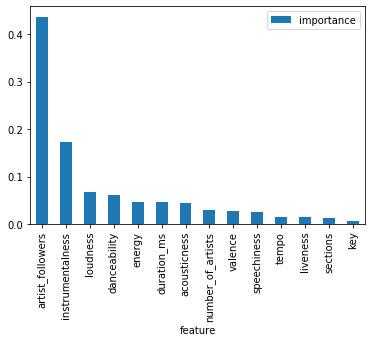

In [25]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(rf.feature_importances_,4)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)
importances.plot.bar()

### Predicting popularity using random forest regression

In [38]:
rf = RandomForestRegressor(criterion = 'mae', min_samples_leaf = 5, min_samples_split = 2,  n_estimators = 10, max_depth = 30)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
acc_rf_reg = round(rf.score(x_test, y_test) * 100, 2)
prec_rf_reg = precision_score(y_test, predictions) * 100
recall_rf_reg = recall_score(y_test, predictions) * 100

print("accuracy:", acc_rf_reg)
print("Precision:", prec_rf_reg)
print("Recall:", recall_rf_reg)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

## Gaussian Naive Bayes

In [18]:
gaussian = GaussianNB() 
gaussian.fit(x_train, y_train)  
y_pred = gaussian.predict(x_test)  
acc_gaussian = round(gaussian.score(x_test, y_test) * 100, 2)
print(acc_gaussian)

79.37


## K-Nearest Neighbor

In [19]:
neighbours = range(3,60,5)
best = 0
for n in neighbours:    
    knn = KNeighborsClassifier(n_neighbors = n) 
    knn.fit(x_train, y_train)  
    y_pred = knn.predict(x_test)  
    acc_knn = round(knn.score(x_test, y_test) * 100, 2)
    if (acc_knn > best):
        best = acc_knn
acc_knn = best
print(best)

83.18


## Support Vector Machine (SVC)

In [255]:
#C_range = np.logspace(-4, 4, 9)
#gamma_range = np.logspace(-4, 4, 9)
C_range = [1]
gamma_range = [0.1]
param_grid = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv = 7)
grid.fit(x_train, y_train)
print(grid.best_params_)

C:\Users\eskil\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'C': 1, 'gamma': 0.1}
86.68


In [28]:
rbf_svc = SVC(kernel='rbf', C = 1, gamma = 0.1)
rbf_svc.fit(x_train, y_train)
predictions = rbf_svc.predict(x_test)

acc_svc = round(rbf_svc.score(x_test, y_test) * 100, 2)
prec_svc = precision_score(y_test, predictions) * 100
recall_svc = recall_score(y_test, predictions) * 100

print("accuracy:", acc_svc)
print("Precision:", prec_svc)
print("Recall:", recall_svc)

accuracy: 88.75
Precision: 86.8923076923077
Recall: 91.27343244990304


## Best model

In [33]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'Random Forest', 'Support Vector Machine'],
    'Accuracy': [acc_log, acc_rf, acc_svc], 
    'precision': [prec_log, prec_rf, prec_svc], 
    'recall': [recall_log, recall_rf, recall_svc]
})
result_df = results.sort_values(by='Accuracy', ascending=False)
result_df.head(9)

,Model,Accuracy,precision,recall
1,Random Forest,91.91,92.028516,91.790562
2,Support Vector Machine,88.75,86.892308,91.273432
0,Logistic Regression,88.35,88.354430,90.239173


In [76]:
x_not_scaled.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,chorus_hit,sections
0,0.741,0.626,1,-4.826,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,41.18681,10
1,0.447,0.247,5,-14.661,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,33.18083,9
2,0.550,0.415,9,-6.557,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,44.89147,9
3,0.502,0.648,0,-5.698,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,29.52521,7
4,0.807,0.887,1,-3.892,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,24.99199,8


In [39]:
frame = pd.DataFrame(x, columns = x_not_scaled.columns)
frame.head()

NameError: name 'x_not_scaled' is not defined